In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv('iris.csv',index_col=0)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [6]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.duplicated().sum()

3

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(147, 5)

array([[<Axes: title={'center': 'SepalLengthCm'}>,
        <Axes: title={'center': 'SepalWidthCm'}>],
       [<Axes: title={'center': 'PetalLengthCm'}>,
        <Axes: title={'center': 'PetalWidthCm'}>]], dtype=object)

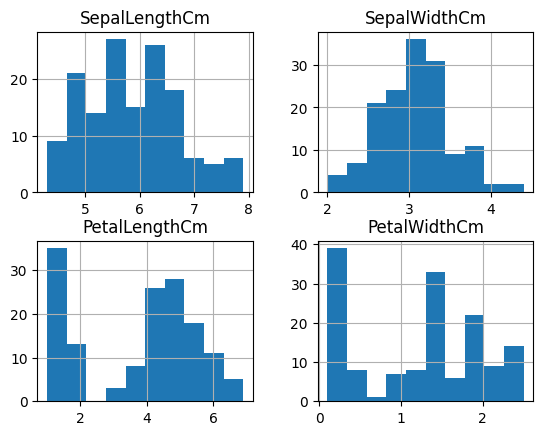

In [12]:
df.hist()

<Axes: >

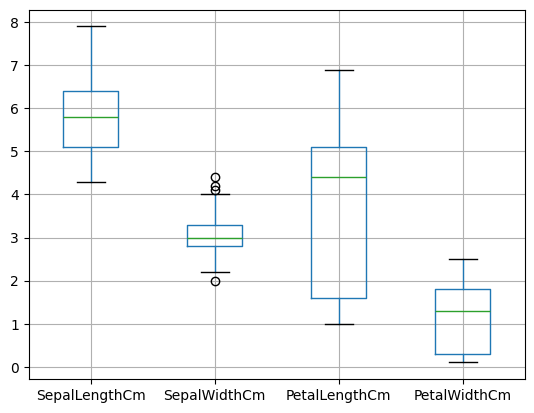

In [13]:
df.boxplot()

In [19]:
def capping(data,columns):
    for col in columns:
        q1=data[col].quantile(0.25)
        q3=data[col].quantile(0.75)
        iqr=q3-q1
        lower=q1-(1.5*iqr)
        upper=q3+(1.5*iqr)
        df[col]=np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))

In [20]:
capping(df,[ 'SepalWidthCm',])

<Axes: >

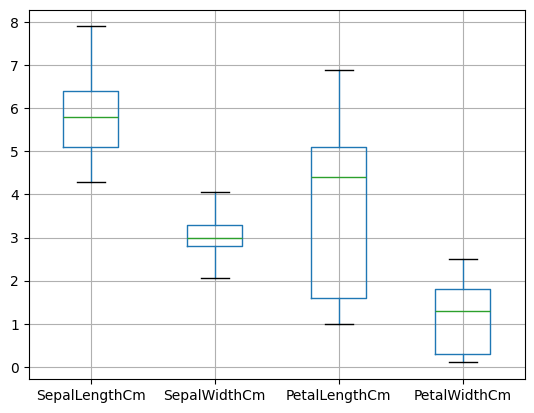

In [21]:
df.boxplot()

In [23]:
lb=LabelEncoder()
df['Species']=lb.fit_transform(df['Species'])
df['Species']

Id
1      0
2      0
3      0
4      0
5      0
      ..
146    2
147    2
148    2
149    2
150    2
Name: Species, Length: 147, dtype: int32

In [25]:
x=df.iloc[:,:-1]
y=df['Species']
model=MultinomialNB()
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=4)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
cr=classification_report(ytest,ypred)
print(cr)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.88      1.00      0.93         7
           2       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.96      0.95      0.95        30
weighted avg       0.97      0.97      0.97        30



In [26]:
a=model.score(xtrain,ytrain)
b=model.score(xtest,ytest)
print(a,b)

0.9658119658119658 0.9666666666666667


(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Setosa'),
  Text(0, 1.5, 'Versicolor'),
  Text(0, 2.5, 'Virginica')])

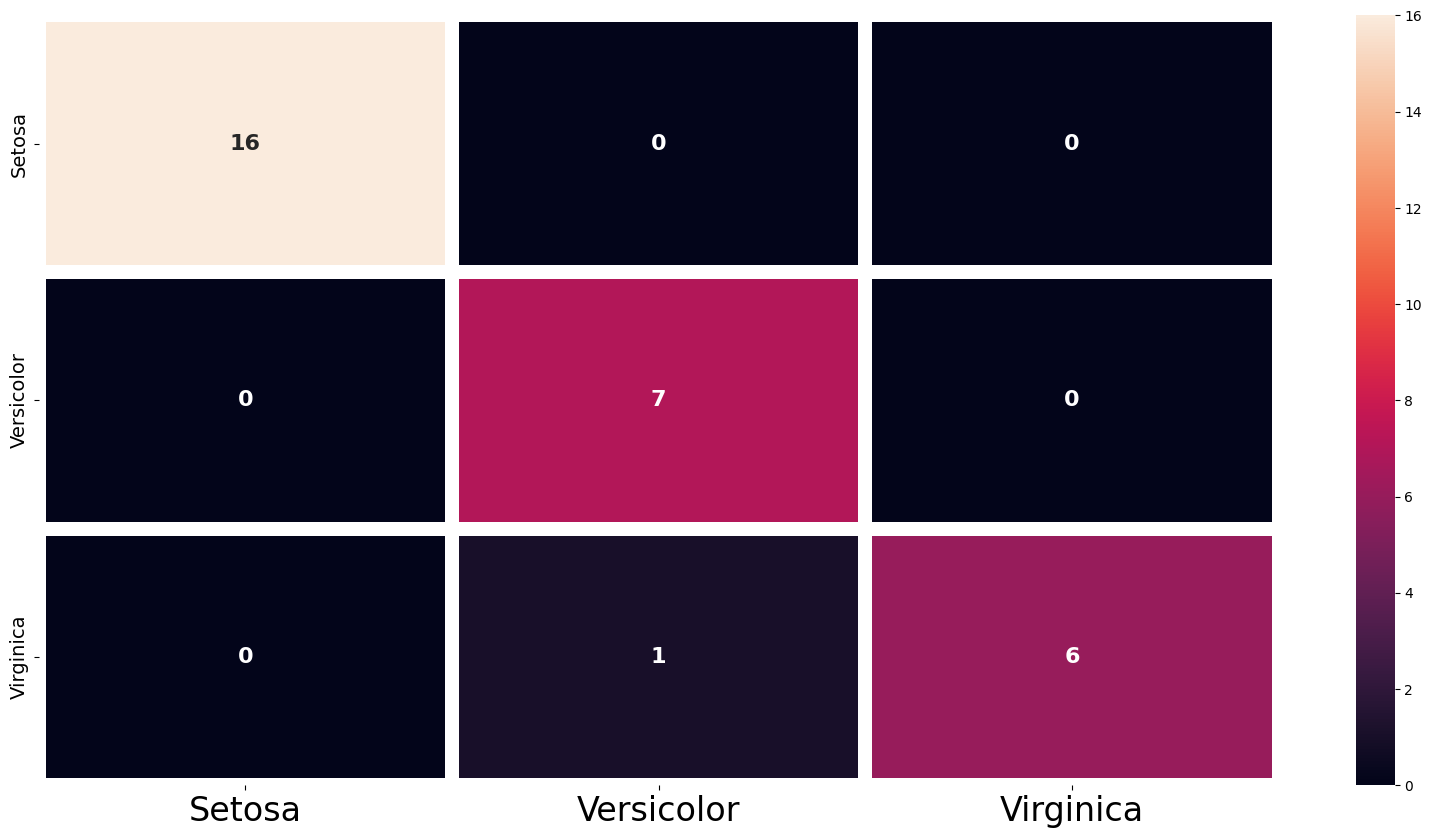

In [44]:
plt.figure(figsize=(20,10))
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,annot_kws={"size": 16, "weight": "bold"}
,xticklabels=["Setosa", "Versicolor", "Virginica"],yticklabels=["Setosa", "Versicolor", "Virginica"],linewidth=10)
plt.xticks(fontsize=24)
plt.yticks(fontsize=14)